#K-Mean Clustering in iPython with sklearn

R-programming with R-Studio is very powerful for performing Analytics. However, Python is not only more versatile, it is also faster and many functions, like building arrays is much easier. Now with multiple GUI's Python is much more user-friendly as well. Here I demonstrate k-Means clustering using Phyton with iPython Notebooks. In fact, this entire article was written within one of these notebooks.

#Introduction
In my preceding article, I introduced iPython. All I will do here is provide the website again. To demonstrate another Analytics task, k-Means clustering, we will use the iris dataset (iris.csv) from R-CRAN. It is best to download it to your local drive and call its use from there. R datasets can be downloaded at https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/00Index.html.

#Importing Modules
There are many modules that enhance the user-friendly computation in Python. For example, Numpy provides a vast amount of numerical capability. However, it can also be used as an efficient multi-dimensional container of generic data. With it, we can define arbitrary datatypes. This allows NumPy to effortlessly and quickly integrate with a wide variety of databases. By convention, when we import a module, we rename it with a shorter named is make calling its function easier. For Numpy, we use np. For statsmodels, we use sm. From other modules, we only import certain functions. For example, from mathplotlib we import the function pyplot.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import cluster
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

#Load the Dataset
This requires a simple read command and the full path of the file location. We also need to know the "shape" of the iris data, so we use a simple print statement to get that information.

In [3]:
data = pd.read_csv("C:\Users\Strickland\Documents\Python Scripts\iris.csv")
print(data.shape)

(150, 5)


#Creating a Dataframe Array
When we import (read) the iris dataset, it is not in an array that we can manipulate with Numpy. So, we want to put it in a np compatible array as follows: (1) The shape is the number of rows and columns, (2) the buffer is the data we are using, and (3) the type of data is numeric floating point. The type statement will return an error if the data is not in a np array.

In [4]:
X = np.ndarray(shape=(150,5), buffer=np.array(data), dtype=float)
X.dtype
type(X.dtype)

numpy.dtype

#Fit the data with K-Means Clustering
For this example, we are using the scikit-learn k_means (sklearn.cluster.KMeans). We define the number of clusters to be 2. The proper syntax for the KMeans function can be found at http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [5]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#Preparing to Plot the Clusters
In our simple plot, we just want the data points of the iris dataset and the centroids. Also, we want to show the plots in our iPython notebook.

In [6]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [7]:
# show plots in the notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


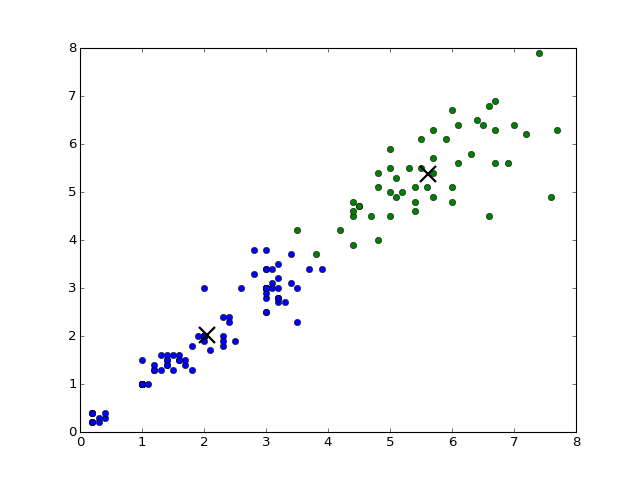

In [8]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()


#Results

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [71]:
# show plots in the notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


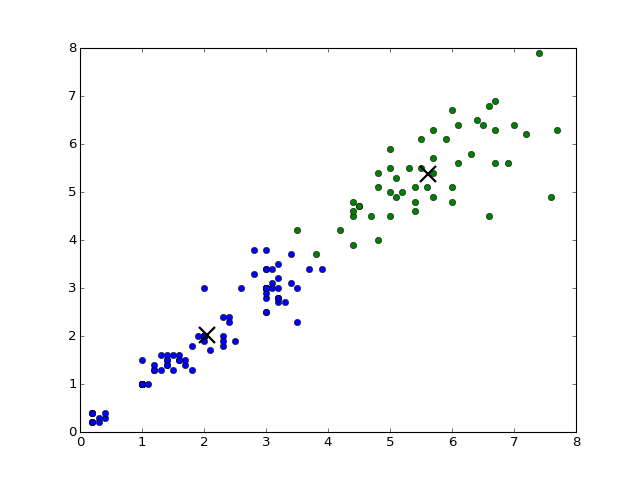

In [72]:
from matplotlib import pyplot
import numpy as np

for i in range(k):
    # select only data observations with cluster label == i
    ds = X[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

#Another Technique
We now perform the same k-Means clustering using a different technique. I have repeated the module imports, dataset import, and array construction for convenience. This time will use kmeans from scipy. Scipy documentation can be found at http://docs.scipy.org/doc/scipy/reference/index.html. 

<IPython.core.display.Javascript object>


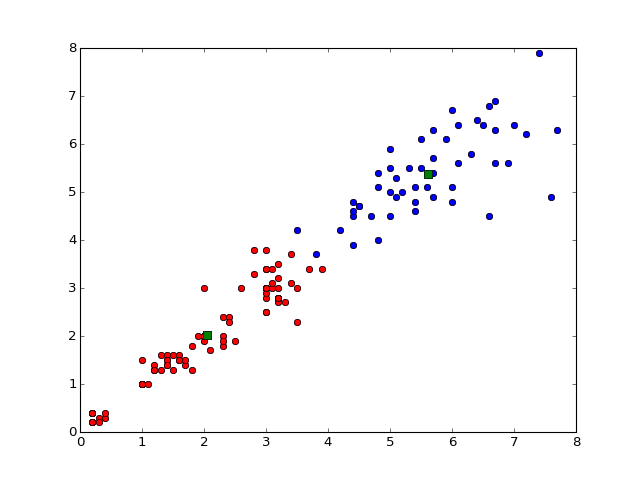

In [11]:
%matplotlib notebook
import numpy as np
import pandas as pd
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq
import matplotlib.pyplot as plt
data = pd.read_csv("C:\Users\Strickland\Documents\Python Scripts\iris.csv")
X = np.ndarray(shape=(150,5), buffer=np.array(data), dtype=float)
# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(X,2)
# assign each sample to a cluster
idx,_ = vq(X,centroids)

# some plotting using numpy's logical indexing
plt.plot(X[idx==0,0],X[idx==0,1],'ob',
     X[idx==1,0],X[idx==1,1],'or')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()

<IPython.core.display.Javascript object>


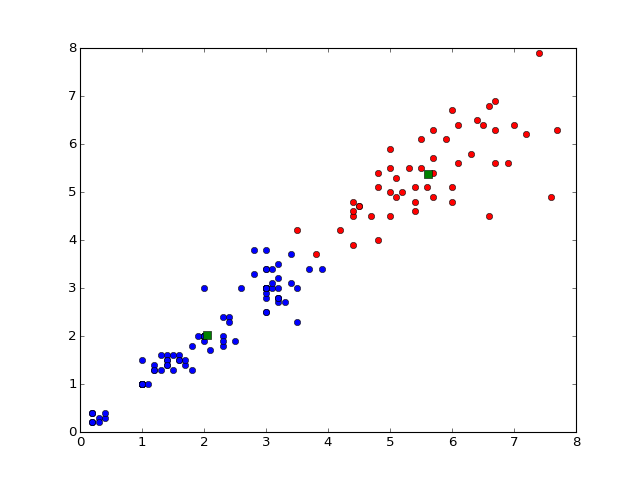

In [14]:
%matplotlib notebook
from scipy.cluster.vq import kmeans2,vq
centroids,_ = kmeans2(X,2)
# assign each sample to a cluster
idx,_ = vq(X,centroids)

# some plotting using numpy's logical indexing
plt.plot(X[idx==0,0],X[idx==0,1],'ob',
     X[idx==1,0],X[idx==1,1],'or')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()